### Introduction to Scientific Python: Part I
# Packages
big projects, sharing code

## packages

* collections of modules
* cross-language integration
* distribution

## distribution

From simplest to most complicated:
1. Anaconda: `conda install [package]`
2. PIP / PyPI: `pip install [package]`
3. GitHub / Git: `git clone [package]`
4. Email

## matplotlib

`pyplot` is just one module in the larger `matplotlib` package.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as anim

%matplotlib inline

## NumPy

A NumPy `ndarray` is a multi-dimensional array -- i.e. like a list, but with multiple indices and every element being of the same type. For example, a two-dimensional array is like a "list of lists" where each sub-list is required to be the same length.

In [2]:
import numpy as np

l = [[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]
print l
print type(l)

print '\n'

a = np.array(l)
print a
print type(a)

[[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]
<type 'list'>


[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
<type 'numpy.ndarray'>


There are multiple ways to create useful arrays

In [7]:
a = np.arange(2, 10, 2)
print a

[2 4 6 8]


In [8]:
a.shape

(4,)

In [9]:
a = np.zeros((4, 1))
print a

[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]


In [12]:
a.squeeze().shape

(4,)

In [4]:
a = np.zeros([2, 3])
print a

[[ 0.  0.  0.]
 [ 0.  0.  0.]]


In [5]:
a = np.ones([2, 3])
print a

[[ 1.  1.  1.]
 [ 1.  1.  1.]]


In [6]:
a = np.random.randn(2, 3)
print a

[[-0.57666115 -1.29350876 -0.26264797]
 [ 0.72259759 -0.21221837 -0.42871971]]


The NumPy array has name useful manipulation functions

In [15]:
a = np.arange(10)
print a
print '\n'

b = a.reshape([2,-1])
print b

[0 1 2 3 4 5 6 7 8 9]


[[0 1 2 3 4]
 [5 6 7 8 9]]


In [14]:
print b
print '\n'

print b.T

[[0 1 2 3 4]
 [5 6 7 8 9]]


[[0 5]
 [1 6]
 [2 7]
 [3 8]
 [4 9]]


Arrays have nice element-wise behavior under basic arithmetic operations. This allows us to avoid needing to write loops.

In [16]:
a = [0, 1, 2]
print a

for i in range(3):
    a[i] *= 2
print a

[0, 1, 2]
[0, 2, 4]


In [17]:
a = np.arange(3)
print a
print 2*a

[0 1 2]
[0 2 4]


In [18]:
print a + a
print a - a
print a * a

[0 2 4]
[0 0 0]
[0 1 4]


We can also do matrix multiplication

In [19]:
a = np.arange(4).reshape([2, 2])
print a
print '\n'

print np.dot(a, a)

[[0 1]
 [2 3]]


[[ 2  3]
 [ 6 11]]


And appling functions along an axis

In [20]:
print a
print '\n'

print a.sum(axis=0)
print '\n'

print a.sum(axis=1)
print '\n'

[[0 1]
 [2 3]]


[2 4]


[1 5]




NumPy arrays allow for fancier indexing

In [21]:
a = np.arange(8)
print a
print '\n'

print a[[1, 3, 6]]

[0 1 2 3 4 5 6 7]


[1 3 6]


In [22]:
print a[a<5]

[0 1 2 3 4]


In [26]:
a = np.arange(10).reshape(2, 5)
a[1, [0, 1, 3]]

array([5, 6, 8])

## SciPy

SciPy contains many submodules for common scientfic computing tasks:
* function optimization
* numerical integration / differentiation
* special functions
* time series analys (e.g. fourier transforms)

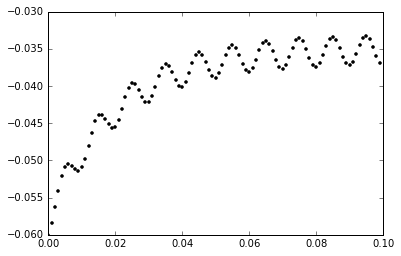

In [27]:
from scipy.integrate import odeint

t_max = 100e-3    # second
dt = 1e-3        # second
tau = 20e-3      # second
el = -60e-3      # milivolt
vr = -70e-3      # milivolt
vth = -50e-3     # milivolt
i_mean = 25e-3   # ampere

def I(t):
    return i_mean*(1+np.sin(2*np.pi*t/0.01))

def v, t):
    return (1.0/tau)*(el - v + I(t))

t = np.arange(0, t_max, dt)
v = odeint(dvdt, [el], t)

plt.plot(t, v, '.k');

## scikit learn

Package for machine learning algorithms:
* regression (linear, nonlinear)
* clustering (K-Means, etc)
* factorization (PCA, NMF, etc)
* more

## Pandas

Pandas provides a `dataframe` object. There are two main difference between the `dataframe` and the NumPy `array`:
1. An `array` can have any number of dimensions; a `dataframe` can only be two dimensional.
2. An `array` must have all elements of the same type; a `dataframe` can have a different datatype for each column

The `dataframe` like a non-visual version of a spreadsheet. If you use `R`, then the Pandas `dataframe` will feel very familiar.

In [28]:
import pandas as pd

df = pd.read_csv('bike-data/day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Brian

WARNING  brian2.groups.group.Group.resolve.resolution_conflict: Variable i is present in the namespace but is also an internal variable of synapses, the internal variable will be used.
WARNING  brian2.groups.group.Group.resolve.resolution_conflict: Variable i is present in the namespace but is also an internal variable of synapses_1, the internal variable will be used.


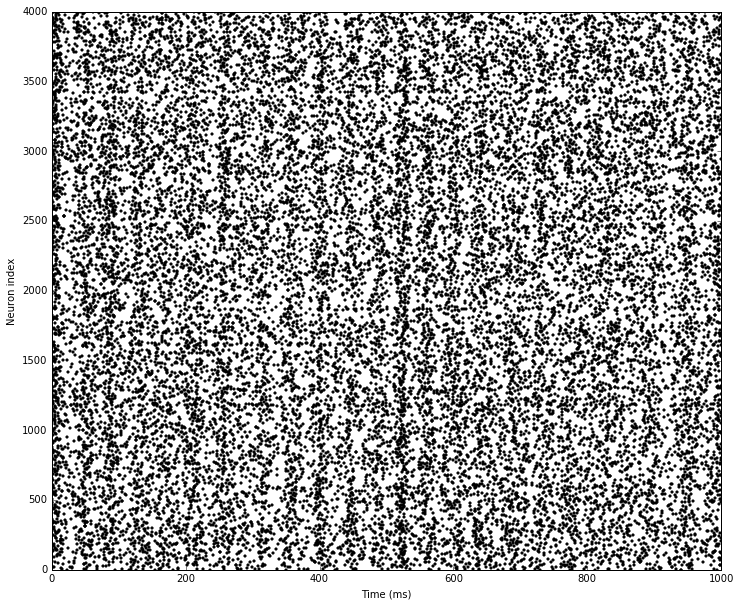

In [29]:
from brian2 import *

taum = 20*ms
taue = 5*ms
taui = 10*ms
Vt = -50*mV
Vr = -60*mV
El = -49*mV

eqs = '''
dv/dt  = (ge+gi-(v-El))/taum : volt (unless refractory)
dge/dt = -ge/taue : volt
dgi/dt = -gi/taui : volt
'''

P = NeuronGroup(4000, eqs, threshold='v>Vt', reset='v = Vr', refractory=5*ms)
P.v = 'Vr + rand() * (Vt - Vr)'
P.ge = 0*mV
P.gi = 0*mV

we = (60*0.27/10)*mV # excitatory synaptic weight (voltage)
wi = (-20*4.5/10)*mV # inhibitory synaptic weight
Ce = Synapses(P, P, pre='ge += we')
Ci = Synapses(P, P, pre='gi += wi')
Ce.connect('i<3200', p=0.02)
Ci.connect('i>=3200', p=0.02)

s_mon = SpikeMonitor(P)

run(1 * second)

figure(figsize=(12, 10))
plot(s_mon.t/ms, s_mon.i, '.k', ms=5)
xlabel('Time (ms)')
ylabel('Neuron index')
show()